In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [66]:
df = pd.read_csv("flat_houses_v5(2).csv")

In [67]:
df.isnull().sum()

PROP_ID                    0
PROPERTY_TYPE              0
CITY_NAME                  0
LOCALITY_NAME              0
OWNTYPE                    0
BEDROOM_NUM                0
BATHROOM_NUM               0
BALCONY_NUM              179
FURNISH                  782
FACING                  2240
FLOOR_NUM               1726
TOTAL_FLOOR               42
LATITUDE                   0
LONGITUDE                  0
AVAILABILITY               0
PRICE                      0
PRICE_SQFT                 0
PRICE_CR                   0
AREA_SQFT                  0
CALCULATED_AREA_SQFT       0
AGE_POSSESSION             0
AMENITIES_CLUSTER          0
LUXURY_SCORE               0
PROP_NAME                  3
dtype: int64

# Property name

In [68]:
df.loc[df["PROP_NAME"].isnull(), "PROP_NAME"] = "Not Known"

# Floor Num

In [69]:
def combine_floornum_and_total_floor(df_row):
  if df_row["PROPERTY_TYPE"] == 'flat':
    return df_row["FLOOR_NUM"]
  else:
    return df_row["TOTAL_FLOOR"]

In [70]:
df["FLOOR"] = df.apply(combine_floornum_and_total_floor, axis = 1)

In [71]:
df["FLOOR"].fillna(0, inplace = True)

In [72]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING',
       'FLOOR_NUM', 'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY',
       'PRICE', 'PRICE_SQFT', 'PRICE_CR', 'AREA_SQFT', 'CALCULATED_AREA_SQFT',
       'AGE_POSSESSION', 'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME',
       'FLOOR'],
      dtype='object')

In [73]:
# df.drop(columns = ["FACING", "FLOOR_NUM","TOTAL_FLOOR", "LATITUDE", "LONGITUDE","AVAILABILITY", "PRICE", "PRICE_SQFT", "AREA_SQFT","LUXURY_SCORE", "PROP_NAME"], inplace = True)

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='PRICE_CR'>

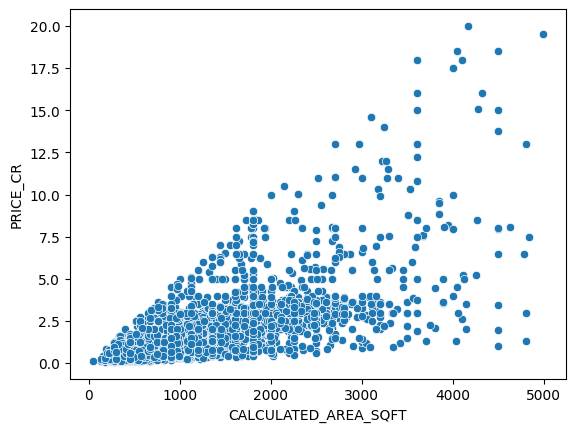

In [74]:
sns.scatterplot(data = df, x = df["CALCULATED_AREA_SQFT"], y = df["PRICE_CR"])

# Facing


<Axes: ylabel='FACING'>

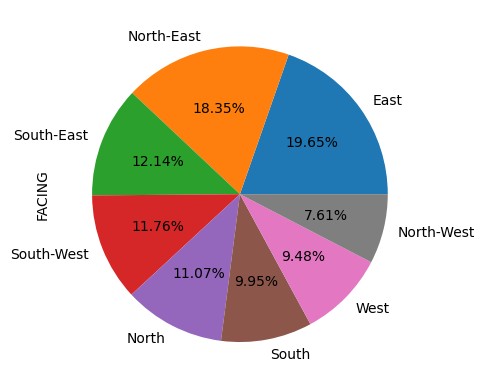

In [75]:
df['FACING'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [76]:
df.drop(columns=['FACING'],inplace=True)

# Balcony Num

In [77]:
df["BALCONY_NUM"].value_counts()

1.0    1865
2.0    1444
3.0    1292
4.0     953
0.0     726
Name: BALCONY_NUM, dtype: int64

In [78]:
df["BALCONY_NUM"].fillna(df["BALCONY_NUM"].mode()[0], inplace = True)

# Furnish

In [79]:
df["FURNISH"].value_counts()

Semifurnished    3351
Unfurnished      1345
Furnished         981
Name: FURNISH, dtype: int64

In [80]:
df.loc[(df["FURNISH"].isnull()) & (df["AVAILABILITY"] == 'Under Construction'), "FURNISH"] = "Unfurnished"

In [81]:
df1 = pd.read_csv("flats_houses_v1.csv")

In [82]:
df1 = df1[["PROP_ID", "FURNISHING_ATTRIBUTES"]]

In [83]:
df2 = df[df["FURNISH"].isnull()]

In [84]:
df_merge = pd.merge(df2, df1, on = "PROP_ID", how = "inner")

In [85]:
def furnish(df_row):
  if isinstance(df_row["FURNISHING_ATTRIBUTES"], float) and np.isnan(df_row["FURNISHING_ATTRIBUTES"]):
    return "Unfurnished"
  else:
    return "Semifurnished"

In [86]:
df_merge["FURNISH"] = df_merge.apply(furnish, axis = 1)

In [87]:
df.loc[df["PROP_ID"].isin(df_merge["PROP_ID"]), "FURNISH"] = df_merge["FURNISH"].values

In [88]:
df.drop(columns = ["FLOOR_NUM","TOTAL_FLOOR","AVAILABILITY", "PRICE", "PRICE_SQFT", "AREA_SQFT","LUXURY_SCORE", "PROP_NAME"], inplace = True)

In [89]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'LATITUDE',
       'LONGITUDE', 'PRICE_CR', 'CALCULATED_AREA_SQFT', 'AGE_POSSESSION',
       'AMENITIES_CLUSTER', 'FLOOR'],
      dtype='object')

In [90]:
def categorize_floor(floor):
  if -1 <= floor <= 2:
    return "Low Floor"
  elif 3 <= floor <= 10:
    return "Mid Floor"
  elif 10 <= floor <= 120:
    return "High Floor"
  else:
    return None

In [91]:
df["FLOOR_CATEGORY"] = df["FLOOR"].apply(categorize_floor)

In [92]:
df.drop(columns = ["FLOOR"], inplace = True)

In [103]:
df.to_csv("flat_houses_v7.csv", index = False)



---



---



---




In [104]:
# Why my model performing so bad?
# When I used random forest score was 60 (used ordinal encoder)
# when I used random forest with cross validation and one hot encoding, the score become 77 (like 17% increase)
# This clearly shows that my model was overfitting
# Why linear regression was performing so badly?
# because I used ordinal encoding which was giving 40 score and also the dataset consists of high outliers
# but I modify the dataset (removed some outliers) and then I used one hot encoding, cross validation, removed locality column (I removed it because of high cardinality and one hot encoding on this column will make a high dimensional dataset)
# then score become 71 (from 44 to 71)

# Remember I am talking about the score. On checking on test dataset the accuracy was very low (for random forest, it was 40)

In [105]:
df = pd.read_csv("flat_houses_v7.csv")

In [106]:
df.sample(5)

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,LATITUDE,LONGITUDE,PRICE_CR,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,FLOOR_CATEGORY
875,L70593266,flat,Dwarka Delhi,Sector 7 Dwarka,Freehold,4.0,3,4.0,Semifurnished,28.591460,77.071560,2.70,2300.0000,Old Property,Moderate,Low Floor
646,A70871308,flat,Dwarka Delhi,Sector 7 Dwarka,Freehold,3.0,2,3.0,Unfurnished,28.583015,77.074020,1.85,1667.0000,Old Property,High-End,Low Floor
2208,N70946866,flat,Dwarka Delhi,Sector 23 Dwarka,Freehold,3.0,4,3.0,Semifurnished,28.562942,77.051301,2.50,1875.0000,Old Property,High-End,Mid Floor
2810,R71385890,flat,West Delhi,Paschim Vihar,Freehold,3.0,2,2.0,Unfurnished,28.666903,77.113038,1.50,1350.0135,Moderately old,Basic,Mid Floor
6218,H56666334,house,North Delhi,Jain Nagar,Power of Attorney,4.0,2,4.0,Unfurnished,28.734987,77.052118,0.90,989.9901,Relatively New,Basic,Low Floor


In [ ]:
df["LOCALITY_NAME"].value_counts()

In [108]:
X = df.drop(columns=['PRICE_CR',"LOCALITY_NAME"])
y = df['PRICE_CR']

In [109]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [110]:
X.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'OWNTYPE', 'BEDROOM_NUM',
       'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'LATITUDE', 'LONGITUDE',
       'CALCULATED_AREA_SQFT', 'AGE_POSSESSION', 'AMENITIES_CLUSTER',
       'FLOOR_CATEGORY'],
      dtype='object')

In [111]:
X.drop(columns = "PROP_ID", inplace = True)

In [112]:
columns_to_encode = ["PROPERTY_TYPE", "CITY_NAME", "OWNTYPE", "FURNISH", "AGE_POSSESSION", "AMENITIES_CLUSTER", "FLOOR_CATEGORY"]

In [113]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [114]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["BEDROOM_NUM", "BATHROOM_NUM", "BALCONY_NUM", "CALCULATED_AREA_SQFT"]),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

In [115]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 500))
])

In [116]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [117]:
scores.mean()

0.803864847035084

In [118]:
scores.std()

0.016673350399758875

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['BEDROOM_NUM',
                                                   'BATHROOM_NUM',
                                                   'BALCONY_NUM',
                                                   'CALCULATED_AREA_SQFT']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['PROPERTY_TYPE', 'CITY_NAME',
                                                   'OWNTYPE', 'FURNISH',
                                                   'AGE_POSSESSION',
                                                   'AMENITIES_CLUSTER',
                                                   'FLOOR_CATEGORY'])])),
                ('regressor', RandomForestRegressor(n_estimators=500))])

In [120]:
y_pred = pipeline.predict(X_test)

In [121]:
y_pred = np.expm1(y_pred)

In [122]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.3429271897082884